In [24]:
from rsa import ExtendedEuclideanAlgorithm, SquareAndMultiply, MillerRabin, RSA
from rsa import probability_to_be_prime
import random
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import matplotlib.pyplot as plt


# Asymmetric Ciphers

**Asymmetric Ciphers** are cryptographic algorithms that use different keys, called respectively **public and private keys**, for encryption and decryption. This property solves one of the main issues of symmetric ciphers, that was the necessity of a secure channel to share the unique key among the Alice and the Bob. The entire process follows this scheme:
- Bob generates both the public and the private key
- Bob sends to Alice the private key over a potentially unsecure channel, meaning that the public key may be "stolen" by an attacker
- Alice uses the public key to encrypt the plaintext and sends the obtained ciphertext to Bob
- Bob uses the private key to decrypt the ciphertext
The reason why everything works fine is in the definiton of the encryption and decryption function: a part from being one the inverse of the other, they are based on what is called **One Way Function**

## RSA

**RSA** is an asymmetric cipher that uses a public and a private key to encrypt and decrypt a message that, unlike stream and block ciphers, is an integer number. The existance of the two keys solves one of the main issues of symmetric ciphers, that is the necessity to share the key between  the sender and  the receiver.

## Extended Euclidean Algorithm

In [25]:
a = 39
m = 60
gcd, s, t = ExtendedEuclideanAlgorithm(a, m)
print(f'The GCD of {a} and {m} is {gcd}')
print(f's = {int(s)} and t = {int(t)} are the values so that sa + tm = gcd(a, m),'\
        f' indeed {int(s)}*{a} + {int(t)}*{m} = {gcd}\n')

a = 2560945
m = 98714510
gcd, s, t = ExtendedEuclideanAlgorithm(a, m)
print(f'The GCD of {a} and {m} is {gcd}')
print(f's = {int(s)} and t = {int(t)} are the values so that sa + tm = gcd(a, m),'\
        f' indeed ({int(s)}*{a}) + ({int(t)}*{m}) = {gcd}\n')

# Particular cases
a = 0
m = 2560945
gcd, s, t = ExtendedEuclideanAlgorithm(a, m)
print(f'The GCD of {a} and {m} is {gcd}')
print(f's = {int(s)} and t = {int(t)} are the values so that sa + tm = gcd(a, m),'\
        f' indeed ({int(s)}*{a}) + ({int(t)}*{m}) = {gcd}\n')

a = 25
m = 25
gcd, s, t = ExtendedEuclideanAlgorithm(a, m)
print(f'The GCD of {a} and {m} is {gcd}')
print(f's = {int(s)} and t = {int(t)} are the values so that sa + tm = gcd(a, m),'\
        f' indeed ({int(s)}*{a}) + ({int(t)}*{m}) = {gcd}')


The GCD of 39 and 60 is 3
s = -3 and t = 2 are the values so that sa + tm = gcd(a, m), indeed -3*39 + 2*60 = 3

The GCD of 2560945 and 98714510 is 5
s = 4135267 and t = -107281 are the values so that sa + tm = gcd(a, m), indeed (4135267*2560945) + (-107281*98714510) = 5

The GCD of 0 and 2560945 is 2560945
s = 0 and t = 1 are the values so that sa + tm = gcd(a, m), indeed (0*0) + (1*2560945) = 2560945

The GCD of 25 and 25 is 25
s = 1 and t = 0 are the values so that sa + tm = gcd(a, m), indeed (1*25) + (0*25) = 25


### Square and Multiply

In [26]:
base = 4
exp = 5
mod = 35
y = SquareAndMultiply(base, exp, mod)
print(f'x^e \\ n = {y}')

x^e \ n = 9


### Miller Rabin Primality Test

In [27]:
n = 6701531651
isprime = MillerRabin(n, 1000)
if isprime:
    print(f'{n} is probably a prime number')
else:
    print(f'{n} is not a prime number')

n = 1962443363
isprime = MillerRabin(n, 1000)
if isprime:
    print(f'{n} is probably a prime number')
else:
    print(f'{n} is not a prime number') 

n = 786398548
isprime = MillerRabin(n, 1000)
if isprime:
    print(f'{n} is probably a prime number')
else:
    print(f'{n} is not a prime number')

n = 4
isprime = MillerRabin(n, 1000)
if isprime:
    print(f'{n} is probably a prime number')
else:
    print(f'{n} is not a prime number')

# n = product of 3 big prime numbers
n = 735495555426839*587000395258763*374906457293939
isprime = MillerRabin(n, 1000)
if isprime:
    print(f'{n} is probably a prime number')
else:
    print(f'{n} is not a prime number')



6701531651 is probably a prime number
1962443363 is probably a prime number
786398548 is not a prime number
4 is not a prime number
161860682384236698774917023853734785426608423 is not a prime number


### RSA implementation testing

In [28]:
##### Testing of the RSA class #####

# Inside the class the instructions in the DEBUG branches are executed
# Then p and q are equal to 335895919357171 and 744053548667773 respectively
bob = RSA(debug = True)
alice = RSA(n = bob.pub_key[0], e = bob.pub_key[1], debug = True)

# To simplify the debug process integers are used instead of bytes
plaintext = 3223675867980
print(f'\nThe plaintext is: {plaintext}')
ciphertext = alice.encrypt(plaintext)
print(f'The ciphertext is: {ciphertext}')
dec_plaintext = bob.decrypt(ciphertext)
print(f'The decrypted plaintext is: {dec_plaintext}')

# Full testing with random p and q and key length equal to 512 bits and
# bytes format for plaintext and ciphertext
bob = RSA(length = 512)
alice = RSA(n = bob.pub_key[0], e = bob.pub_key[1])
plaintext = random.randbytes(20)
print(f'\nThe plaintext is: {plaintext}')
ciphertext = alice.encrypt(plaintext)
print(f'The ciphertext is: {ciphertext}')
dec_plaintext = bob.decrypt(ciphertext)
print(f'The decrypted plaintext is: {dec_plaintext}')
 


The plaintext is: 3223675867980
The ciphertext is: 64091386761571093932794909611
The decrypted plaintext is: 3223675867980

The plaintext is: b'\xd90\xed\xe0\x86@\xca\x11H\x8fC\xa1\xdd\xa8\x98\xdb\xf9T\xdc\x90'
The ciphertext is: b'n\x86\xaa\xaf\xb1\xaa:\xb1\x84\xbd\x02\xdd\x92u\xdc\xea\xe4\x12\xc2\x89\xdd\x97I\xfek\x83\xef\x10H$\x9e8\xc4\x18H\x9cH\xcd\x95z=\xa6{\xae\xe0\xb5y\x8c@\n\xe5\x96\xde\xc2Of"\xa1\xde\xf9#~\xfe\x17'
The decrypted plaintext is: b'\xd90\xed\xe0\x86@\xca\x11H\x8fC\xa1\xdd\xa8\x98\xdb\xf9T\xdc\x90'


In [29]:
# The plaintext is chosen so that it longer than the key length. For this reason
# it cannot be encrypted. Let's see if an error is raised...
bob = RSA(length = 20)
print(bob.pub_key)
print(bob.priv_key)
alice = RSA(n = bob.pub_key[0], e = bob.pub_key[1])
plaintext = random.randbytes(30)
print(f'\nThe plaintext is: {plaintext}')
try:
    ciphertext = alice.encrypt(plaintext)
    print(f'The ciphertext is: {ciphertext}')
    dec_plaintext = bob.decrypt(ciphertext)
    print(f'The decrypted plaintext is: {dec_plaintext}')
except ValueError as e:
    print(e)

(550339, 5)
(550339, 439085)

The plaintext is: b"'\xa0O\x08\x1aT!\x17U\x17\x92\x98\x16;\x0f\x0b5:\xd09\xec\xbb\xa8\xec\x01\x9d~{\xf8\xfa"
ERROR -> the plaintext to encrypt is too long. Try with a shorter one.


### RSA and AES

In [30]:
with open('lorem_ipsum.txt', 'r') as f:
    aes_plaintext = f.read()
print(aes_plaintext[:70] + ' ...')

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmo ...


In [31]:
# AES.key_size is the list [16, 24, 32]. We select the third as
# key length (256 bits)

alice_aes_key = random.randbytes(AES.key_size[2])
iv = random.randbytes(16)
bob_rsa = RSA(length = 512)
alice_rsa = RSA(n = bob_rsa.pub_key[0], e = bob_rsa.pub_key[1])
bob_aes_key = bob_rsa.decrypt(alice_rsa.encrypt(alice_aes_key))
alice_aes = AES.new(alice_aes_key, AES.MODE_CBC, iv)
bob_aes = AES.new(bob_aes_key, AES.MODE_CBC, iv)
padded_aes_plaintext = pad(aes_plaintext.encode(), AES.block_size)
aes_ciphertext = alice_aes.encrypt(pad(aes_plaintext.encode(), AES.block_size))
dec_aes_plaintext = (unpad(bob_aes.decrypt(aes_ciphertext), AES.block_size)).decode()
if aes_plaintext == dec_aes_plaintext:
    print('Everything worked fine. Great job!')
    print(f'The decrypted plaintext is:\n{dec_aes_plaintext[:70]} ...')
else:
    print('Something went wrong. Check your implementation')


Everything worked fine. Great job!
The decrypted plaintext is:
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmo ...


### Probability that a large random number is prime

The RSA key generation requires two very large prime numbers p and q. These are obtained by drawing some random numbers of $\frac{L}{2}$ bits (L is the key length) and checking whether they are prime using the Miller Rabin Test. Depeding on the required key length (typical values for RSA are 512, 1024 or 2048 bits) the probability that such big numbers end up to be prime is very low and the larger they are the lower is the probabiltiy.

...........
rel diff: inf
rel diff: 2.3333333333333335
rel diff: 0.26666666666666644
rel diff: 0.3333333333333334
rel diff: 0.2631578947368422
rel diff: 0.0
rel diff: 0.12962962962962968
rel diff: 0.001821493624772177
rel diff: 0.001212121212121337
...........
rel diff: inf
rel diff: 3.0
rel diff: 0.888888888888889
rel diff: 0.019607843137254898
rel diff: 0.06666666666666665
...........
rel diff: inf
rel diff: inf
rel diff: 1.666666666666667
rel diff: 0.6666666666666665
rel diff: 0.3333333333333334
rel diff: 0.29999999999999993
rel diff: 0.09401709401709407
rel diff: 0.01886792452830197


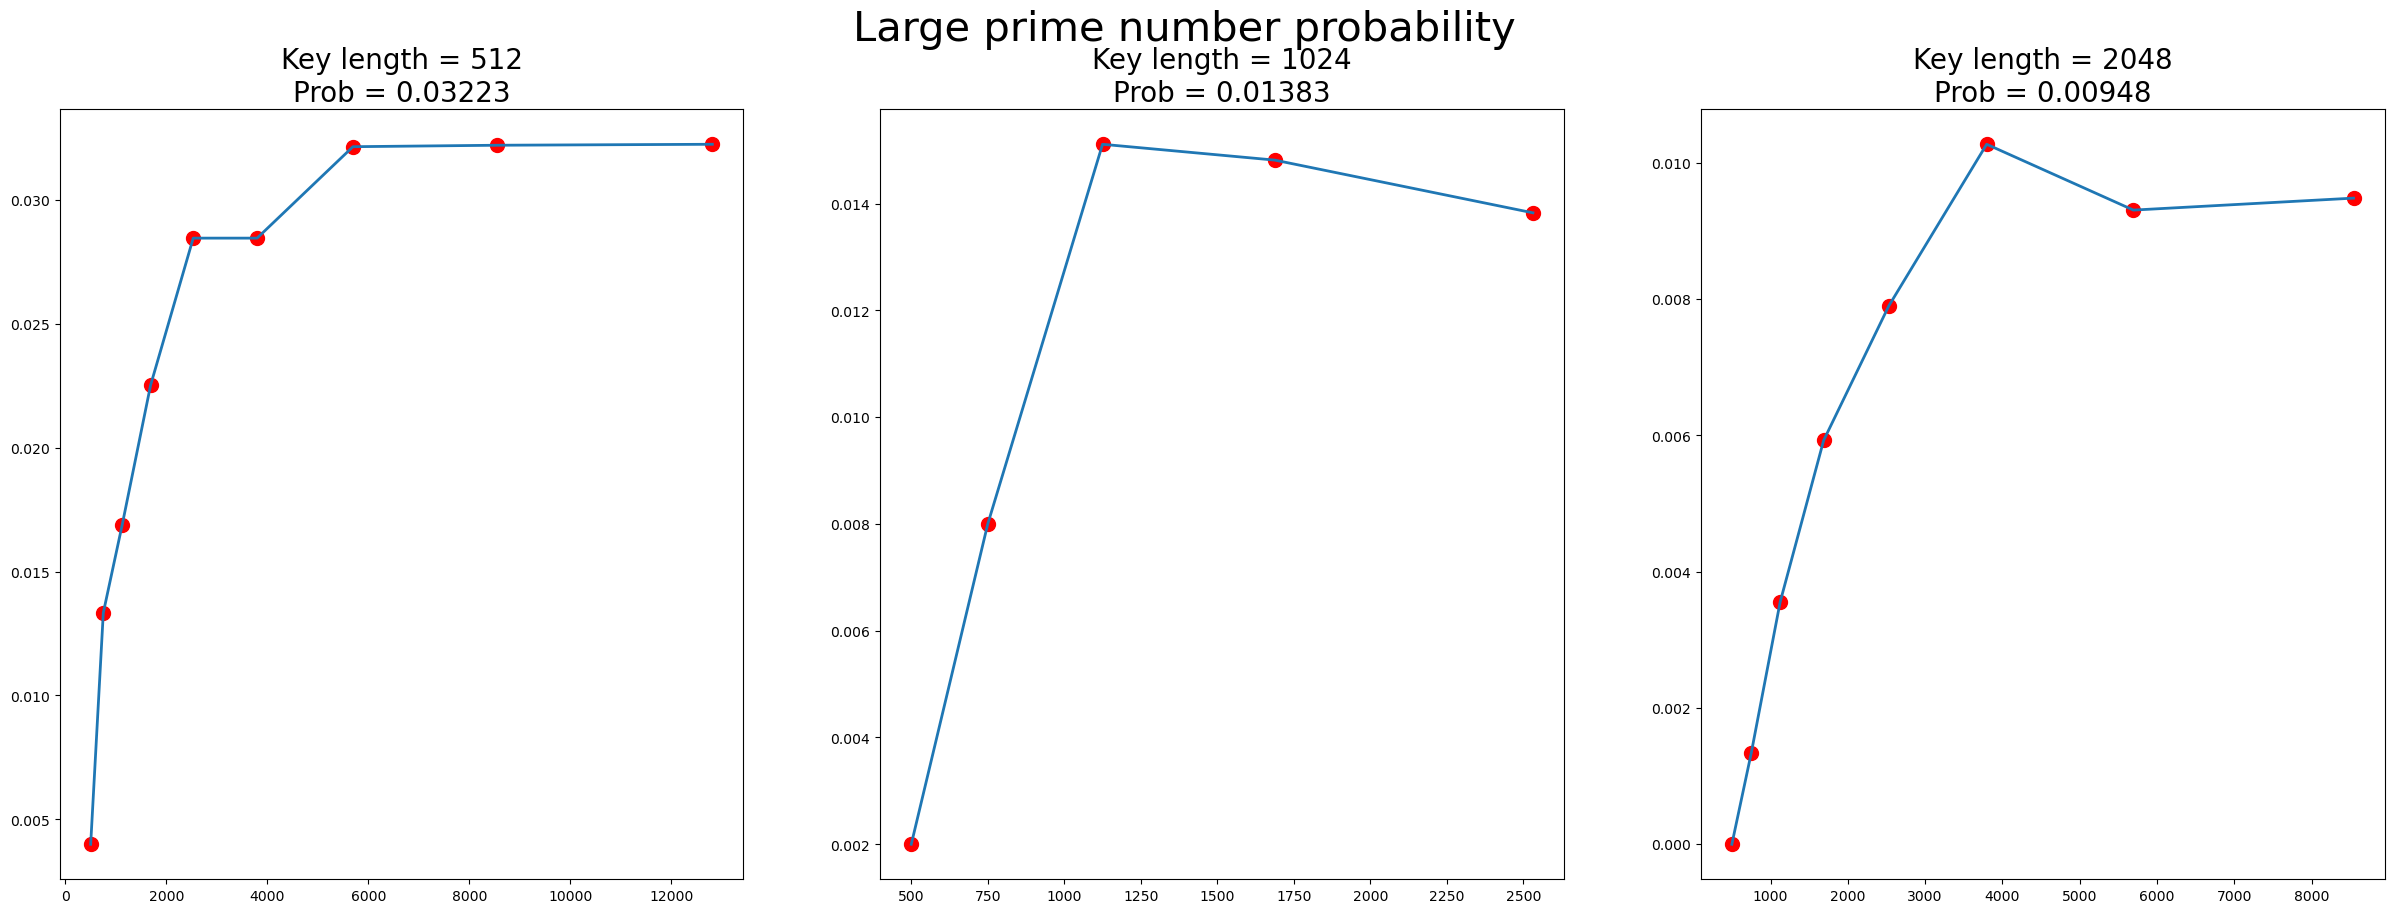

In [32]:
key_lengths = [512, 1024, 2048]
fig, axs = plt.subplots(1, 3, figsize=(30,10))
fig.suptitle('Large prime number probability', fontsize=30)
for idx, length in enumerate(key_lengths):
    print('...........')
    est, prob = probability_to_be_prime(length, 0.1, 500, 128000)
    axs[idx].plot(list(est.keys()), list(est.values()), linewidth=2)
    axs[idx].scatter(list(est.keys()), list(est.values()), color='r', s=100)
    axs[idx].set_title(f'Key length = {length}\nProb = {prob:.5f}', fontsize=20)


## Conclusions

 ## References